# CS-UY 3943 - Introduction of Data Science
## Final Project: Tweet Sentiment Extraction

Please edit the cell below to add your name, NetID, assigned group, and group members for this assignment. **Complete this section before proceeding to the assignment questions.**

Name:  Taylor Wong
NetID:  tw1835
Group Member 1:  Thomas Scarola
NetID:  tws285
***

### Preliminary Data Analysis

#### Include 1 or 2 plots or data tables that demonstrate initial EDA efforts


1\. Read the data file `train.csv` into your program as a `pandas` `DataFrame`

In [1]:
#Place your code here
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

train_df = pd.read_csv('train.csv')
train_df.head(10).sort_values('Survived')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


<hr />

2. Figure out who survived: which column had highest correlation with `Survived`?
<br><br>
First separate into dummy classes to access all categorical data too, then do correlations


In [2]:
# Figure out who survived: rank columns in order of correlation with survival

# convert categorical data to dummies
train_df_origin = pd.get_dummies(train_df.drop(columns='Name'))
train_df_origin = train_df_origin.drop(labels=['Sex_male', 'Ticket_110152', 'Cabin_T', 'Embarked_S'], axis=1)
print(train_df_origin.columns)

# figure out correlation between survival and all other features
train_df_origin.corr().sort_values('Survived', ascending=False)['Survived']

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare',
       'Sex_female', 'Ticket_110413', 'Ticket_110465',
       ...
       'Cabin_F E69', 'Cabin_F G63', 'Cabin_F G73', 'Cabin_F2', 'Cabin_F33',
       'Cabin_F38', 'Cabin_F4', 'Cabin_G6', 'Embarked_C', 'Embarked_Q'],
      dtype='object', length=836)


Survived           1.000000
Sex_female         0.543351
Fare               0.257307
Embarked_C         0.168240
Cabin_B96 B98      0.085083
                     ...   
Ticket_347088     -0.064988
Ticket_347082     -0.070234
Ticket_CA. 2343   -0.070234
Age               -0.077221
Pclass            -0.338481
Name: Survived, Length: 836, dtype: float64

Text(0.5, 1.01, 'Percentage of Surivors by Sex')

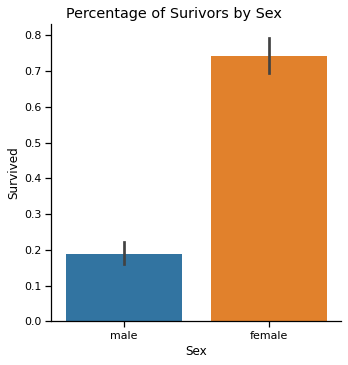

In [9]:
#plot the percentage of people that survived compared to gender
sex_plot = sns.catplot(data=train_df, x='Sex', y='Survived', kind='bar', margin_titles=True)
sex_plot.fig.suptitle('Percentage of Surivors by Sex', y=1.01)

Text(0.5, 1.01, 'Distribution of Surivors by Age')

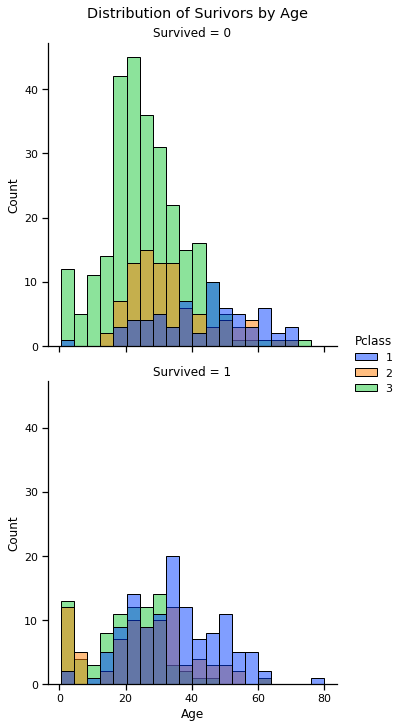

In [8]:

#plot the distribution of people that survived based on their ages, with the hue being there class
age_class_plot = sns.displot(data=train_df, x='Age', kind='hist', row='Survived', hue='Pclass', palette='bright')
age_class_plot.fig.suptitle('Distribution of Surivors by Age', y=1.01)

Text(0.5, 1.01, 'Distribution of Surivors by Fare')

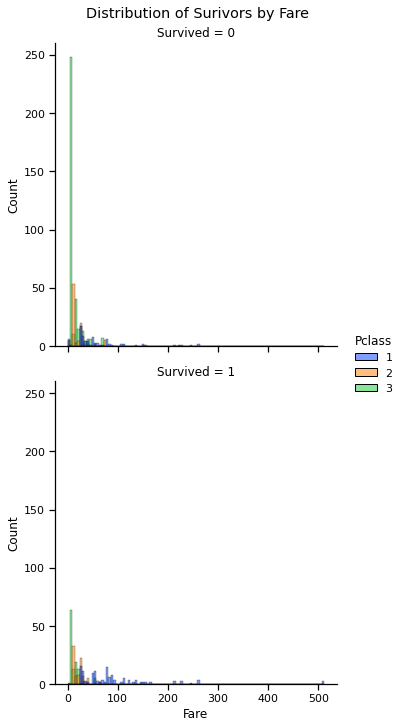

In [10]:

#plot the distribution of people that survived based on their fares, with the hue being there class
fare_class_plot = sns.displot(data=train_df, x='Fare', kind='hist', row='Survived', hue='Pclass', palette='bright')
fare_class_plot.fig.suptitle('Distribution of Surivors by Fare', y=1.01)


#### Brief discussion of what EDA has revealed about the data

<p>
<span style="color:blue">
    Most influential in determining survival: gender, socio-economic class (Pclass), fare:
    <br><br>
    1. Gender: women 
    <br>
    2. Pclass: upper class (=1, middle=2, lower=3; negative correlation)
    <br>
    3. Fare: those who bought more expensive tickets (related to Pclass; rooms on higher decks)
    <br>
    About 70% of the survivors were female
    <br>
    A vast majority of the people who did not survive were in the lower class, and between the ages of 20 to 30
</span>
</p>

## Logistic Regression

In [45]:
# import sklearn.datasets
# wine = sklearn.datasets.load_wine()
# wine.data, wine.target

In [67]:
# create train data: categorical->numerical, no survival
train_df_OWS = train_df_origin
train_df_OWS = train_df_OWS.drop(labels='Survived', axis=1)
train_df_OWS.head()
# save survival data 
train_target_survived = train_df_origin['Survived']

# note: missing age data --> fill in with average ages
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp.fit(train_df_OWS)
train_df_OWS = imp.transform(train_df_OWS)
# train_df_OWS, train_target_survived

#### Using SVC Model

In [72]:
# perform logistic regression using SVC
from sklearn.svm import SVC
svm = SVC() # default hyperparameters
svm.fit(train_df_OWS, train_target_survived)
svm.score(train_df_OWS, train_target_survived)

0.6565656565656566

#### Using Logistic Regression Model

In [71]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train_df_OWS, train_target_survived)
lr.score(train_df_OWS, train_target_survived)

/Users/taylorwong/opt/anaconda3/envs/introds/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8361391694725028

#### Predicting Survival: Using Logistic Regression Model

In [84]:
# read in test data 
test_df = pd.read_csv('test.csv')

# convert categorical data to dummies
test_df_origin = pd.get_dummies(test_df.drop(columns='Name'))
test_df_origin = test_df_origin.drop(labels=['Sex_male', 'Embarked_S'], 
                                     axis=1)
# print(test_df_origin.columns)

# note: missing age data --> fill in with average ages
imp.fit(test_df_origin)
test_df_origin = imp.transform(test_df_origin)

In [85]:
y_pred_prob = lr.predict_proba(test_df_origin)[:, 1]

ValueError: X has 448 features, but LogisticRegression is expecting 835 features as input.

#### Plotting ROC Curve

In [73]:
from sklearn.metrics import roc_curve